# Mini-Project 1 : Image Classification and Regression

## Author : Yonatan Deloro

# TODO PART 4 : explain solution, comment 

# TODO: explain solution, comment 

In [4]:
#https://keras.io/

#imports

from mp1 import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Flatten, Reshape
from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

#%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 7,7

IMAGE_SIZE = 72

Using TensorFlow backend.


# Part 1 : Simple Classification

In [3]:
[X, Y] = generate_dataset_classification(650, noise=20)
[X_train, Y_train] = [X[:300],Y[:300]]
[X_val, Y_val] = [X[300:350],Y[300:350]]
[X_test, Y_test] = [X[350:],Y[350:]]

Creating data:
Done


In [5]:
#building a linear classifier

def build_linear_classifier():
    model = Sequential()
    model.add(Dense(3, input_shape=(IMAGE_SIZE*IMAGE_SIZE,)))
    model.add(Activation('softmax'))
    return model

model = build_linear_classifier()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15555     
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


In [5]:
optimizers = {
   "sgd" : SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True),
   "adam" : Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
}

early_stopping_monitor = EarlyStopping(patience = 5)

In [7]:
categorical_Y_train = to_categorical(Y_train)
categorical_Y_val = to_categorical(Y_val)

losses = {}
trained_models = {}

for (name_opt,opt) in optimizers.items():
    print("\nTraining the model with "+name_opt)

    model = build_linear_classifier()
    model.compile(loss='categorical_crossentropy',optimizer=opt, metrics = ["accuracy"])
    history = model.fit(X_train, categorical_Y_train, validation_data=(X_val,categorical_Y_val), epochs=100, callbacks=[early_stopping_monitor], batch_size=32)

    losses[name_opt]= {}
    losses[name_opt]["train"] = history.history['loss']
    losses[name_opt]["val"] = history.history['val_loss']
    
    trained_models[name_opt] = model


Training the model with adam
Train on 300 samples, validate on 50 samples
Epoch 1/100
300/300 [==============================] - 0s 713us/step - loss: 1.7307 - acc: 0.4200 - val_loss: 0.9581 - val_acc: 0.6600
Epoch 2/100
300/300 [==============================] - 0s 84us/step - loss: 1.1007 - acc: 0.5333 - val_loss: 0.6048 - val_acc: 0.7400
Epoch 3/100
300/300 [==============================] - 0s 91us/step - loss: 0.6057 - acc: 0.7567 - val_loss: 0.3649 - val_acc: 0.8800
Epoch 4/100
300/300 [==============================] - 0s 90us/step - loss: 0.4384 - acc: 0.8233 - val_loss: 0.3146 - val_acc: 0.9600
Epoch 5/100
300/300 [==============================] - 0s 86us/step - loss: 0.3685 - acc: 0.8933 - val_loss: 0.3603 - val_acc: 0.8200
Epoch 6/100
300/300 [==============================] - 0s 94us/step - loss: 0.3774 - acc: 0.7867 - val_loss: 0.5640 - val_acc: 0.7400
Epoch 7/100
300/300 [==============================] - 0s 90us/step - loss: 0.4962 - acc: 0.7667 - val_loss: 0.8660 - va

300/300 [==============================] - 0s 71us/step - loss: 0.1078 - acc: 0.9900 - val_loss: 0.1430 - val_acc: 0.9600
Epoch 22/100
300/300 [==============================] - 0s 69us/step - loss: 0.1122 - acc: 0.9833 - val_loss: 0.1132 - val_acc: 0.9800
Epoch 23/100
300/300 [==============================] - 0s 73us/step - loss: 0.1044 - acc: 0.9767 - val_loss: 0.0993 - val_acc: 0.9800
Epoch 24/100
300/300 [==============================] - 0s 70us/step - loss: 0.1003 - acc: 0.9900 - val_loss: 0.1016 - val_acc: 0.9800
Epoch 25/100
300/300 [==============================] - 0s 77us/step - loss: 0.0931 - acc: 0.9833 - val_loss: 0.0908 - val_acc: 0.9800
Epoch 26/100
300/300 [==============================] - 0s 68us/step - loss: 0.0938 - acc: 0.9900 - val_loss: 0.0881 - val_acc: 1.0000
Epoch 27/100
300/300 [==============================] - 0s 73us/step - loss: 0.0889 - acc: 0.9900 - val_loss: 0.1134 - val_acc: 0.9600
Epoch 28/100
300/300 [==============================] - 0s 71us/step

Epoch 82/100
300/300 [==============================] - 0s 84us/step - loss: 0.0345 - acc: 0.9933 - val_loss: 0.0334 - val_acc: 1.0000
Epoch 83/100
300/300 [==============================] - 0s 66us/step - loss: 0.0358 - acc: 0.9967 - val_loss: 0.0363 - val_acc: 1.0000
Epoch 84/100
300/300 [==============================] - 0s 74us/step - loss: 0.0342 - acc: 0.9933 - val_loss: 0.0363 - val_acc: 1.0000
Epoch 85/100
300/300 [==============================] - 0s 71us/step - loss: 0.0337 - acc: 0.9967 - val_loss: 0.0326 - val_acc: 1.0000
Epoch 86/100
300/300 [==============================] - 0s 79us/step - loss: 0.0343 - acc: 0.9933 - val_loss: 0.0311 - val_acc: 1.0000
Epoch 87/100
300/300 [==============================] - 0s 84us/step - loss: 0.0319 - acc: 1.0000 - val_loss: 0.0350 - val_acc: 1.0000
Epoch 88/100
300/300 [==============================] - 0s 80us/step - loss: 0.0325 - acc: 1.0000 - val_loss: 0.0350 - val_acc: 1.0000
Epoch 89/100
300/300 [==============================] -

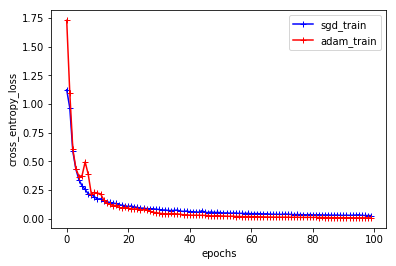

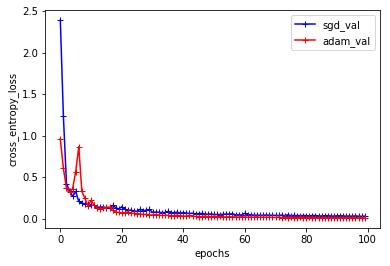

In [8]:
epochs = np.arange(len(losses['sgd']['train']))
plt.plot(epochs,losses["sgd"]['train'],marker="+",color="b",label="sgd_train")
plt.plot(epochs,losses["adam"]['train'],marker="+",color="r",label="adam_train")
plt.xlabel("epochs") ; plt.ylabel("cross_entropy_loss") ; plt.legend()
plt.show()

plt.plot(epochs,losses["sgd"]['val'],marker="+",color="b",label="sgd_val")
plt.plot(epochs,losses["adam"]['val'],marker="+",color="r",label="adam_val")
plt.xlabel("epochs") ; plt.ylabel("cross_entropy_loss") ; plt.legend()
plt.show()

In [9]:
categorical_Y_test = to_categorical(Y_test)
res = trained_models["sgd"].evaluate(X_test, categorical_Y_test)
print("SGD optimizer.\ncross-entropy loss, accurracy score : \n",res,"\n")

res = trained_models["adam"].evaluate(X_test, categorical_Y_test)
print("Adam optimizer.\ncross-entropy loss, accurracy score : \n",res)

300/300 [==============================] - 0s 39us/step
SGD optimizer.
cross-entropy loss, accurracy score :  [0.03593337387467424, 0.9966666666666667] 

300/300 [==============================] - 0s 46us/step
Adam optimizer.
cross-entropy loss, accurracy score :  [0.010331616556892792, 1.0]


proba square, circle, triangle


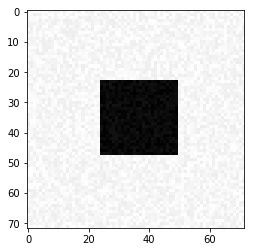

[[0.9560172  0.04298434 0.00099844]]


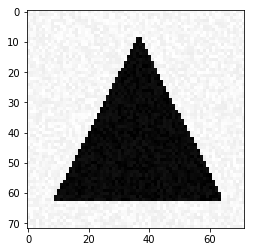

[[0.00133213 0.00192649 0.99674135]]


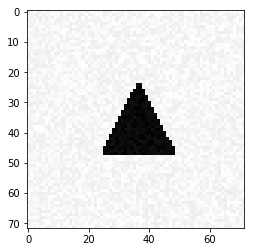

[[0.0054751  0.00256911 0.99195576]]


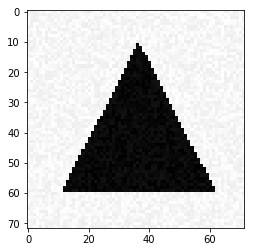

[[9.089871e-04 6.243973e-04 9.984666e-01]]


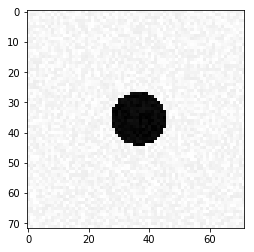

[[0.04755514 0.9218298  0.03061504]]


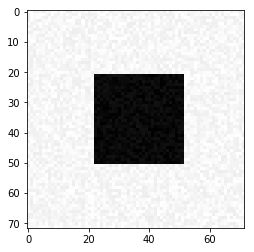

[[0.94550836 0.05233933 0.00215226]]


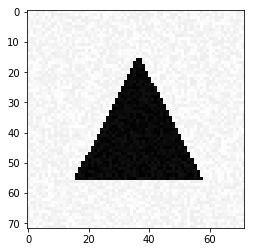

[[1.3161394e-03 5.1297044e-04 9.9817085e-01]]


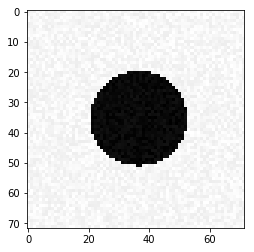

[[1.3304244e-02 9.8596442e-01 7.3134759e-04]]


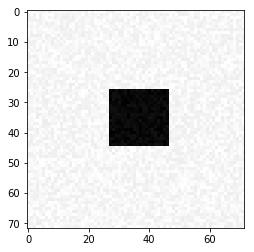

[[0.7703177  0.22388303 0.00579924]]


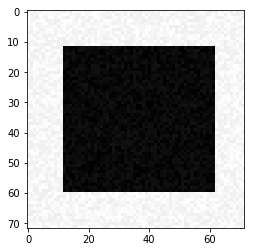

[[9.9303377e-01 6.4433385e-03 5.2285800e-04]]


In [18]:
#plotting some data and their predictions

name_labels = ["rectangle","circle", "triangle"]

fig, ax = plt.subplots(5, 5, figsize=(7, 7))
fig.subplots_adjust(hspace=0.5, wspace=0.1)

for (idx,k) in enumerate(np.random.choice(X_test.shape[0],25)):
    i = idx%5; j = idx//5
    ax[i, j].xaxis.set_major_locator(plt.NullLocator())
    ax[i, j].yaxis.set_major_locator(plt.NullLocator())
    ax[i, j].imshow(X_test[k].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
    predicted_Y = model.predict(X_test[k][None,:])
    label = name_labels[np.argmax(predicted_Y)]
    ax[i,j].text(-0.5,-0.5,label,fontsize=10)

plt.show()

# Part 2 - Visualization of the Solution

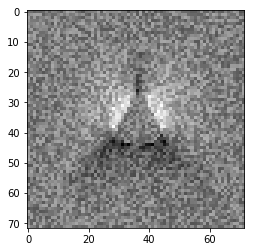

In [19]:
#visualizing the weights of the three neurons

model = trained_models["adam"]
W = model.get_weights()[0] #only focus on W (not intercept)

for neuron in range(W.shape[1]):
    print("weights of unit #"+str(neuron))
    plt.imshow(W[:,neuron].reshape((IMAGE_SIZE,IMAGE_SIZE)), cmap='gray')
    plt.show()

# Part 3 - A More Difficult Classification Problem

## a)  a linear classifier can"t learn the classification frontiers

In [79]:
N_train = 300 ; N_val = 100 ; N_test = 300
N_total = N_train + N_val + N_test

[X, Y] = generate_dataset_classification(N_total, noise=20, free_location=True)

[X_train, Y_train] = [X[:N_train],Y[:N_train]]
[X_val, Y_val] = [X[N_train:N_train+N_val],Y[N_train:N_train+N_val]]
[X_test, Y_test] = [X[N_train+N_val:],Y[N_train+N_val:]]

categorical_Y_train = to_categorical(Y_train)
categorical_Y_val = to_categorical(Y_val)
categorical_Y_test = to_categorical(Y_test)

#alternatively, we could have used generate_test_set_classification(300)

Creating data:
Done


In [70]:
model = build_linear_classifier()
model.compile(loss='categorical_crossentropy',optimizer=optimizers["sgd"], metrics = ["accuracy"])
history = model.fit(X_train, categorical_Y_train, validation_data=(X_val,categorical_Y_val), epochs=100, callbacks=[early_stopping_monitor], batch_size=32)

Train on 1000 samples, validate on 100 samples
Epoch 1/100
1000/1000 [==============================] - 0s 221us/step - loss: 1.3480 - acc: 0.4040 - val_loss: 2.1853 - val_acc: 0.3100
Epoch 2/100
1000/1000 [==============================] - 0s 64us/step - loss: 1.1806 - acc: 0.4760 - val_loss: 0.9021 - val_acc: 0.5500
Epoch 3/100
1000/1000 [==============================] - 0s 66us/step - loss: 0.9317 - acc: 0.5680 - val_loss: 1.1902 - val_acc: 0.4900
Epoch 4/100
1000/1000 [==============================] - 0s 71us/step - loss: 0.9468 - acc: 0.5700 - val_loss: 1.7307 - val_acc: 0.4600
Epoch 5/100
1000/1000 [==============================] - 0s 71us/step - loss: 1.0716 - acc: 0.5390 - val_loss: 1.5709 - val_acc: 0.4500
Epoch 6/100
1000/1000 [==============================] - 0s 70us/step - loss: 0.8991 - acc: 0.6060 - val_loss: 1.2224 - val_acc: 0.5600
Epoch 7/100
1000/1000 [==============================] - 0s 70us/step - loss: 0.8338 - acc: 0.6080 - val_loss: 0.8650 - val_acc: 0.5600


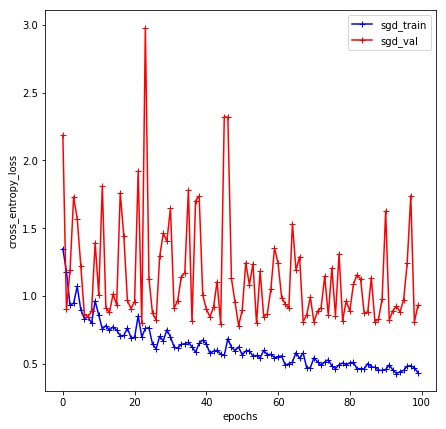

In [71]:
epochs = np.arange(len(history.history['loss']))
plt.plot(epochs,history.history['loss'],marker="+",color="b",label="sgd_train")
plt.plot(epochs,history.history['val_loss'],marker="+",color="r",label="sgd_val")
plt.xlabel("epochs") ; plt.ylabel("cross_entropy_loss") ; plt.legend()
plt.show()

In [183]:
res = model.evaluate(X_test, categorical_Y_test)
print("SGD optimizer.\ncross-entropy loss, accurracy score : \n",res,"\n")

300/300 [==============================] - 0s 45us/step
SGD optimizer.
cross-entropy loss, accurracy score :  [0.9667399930953979, 0.5966666662693023] 



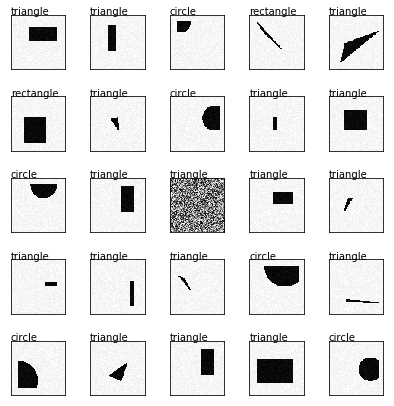

In [77]:
#plotting some data and their predictions

name_labels = ["rectangle","circle", "triangle"]

fig, ax = plt.subplots(5, 5, figsize=(7, 7))
fig.subplots_adjust(hspace=0.5, wspace=0.1)

for (idx,k) in enumerate(np.random.choice(X_test.shape[0],25)):
    i = idx%5; j = idx//5
    ax[i, j].xaxis.set_major_locator(plt.NullLocator())
    ax[i, j].yaxis.set_major_locator(plt.NullLocator())
    ax[i, j].imshow(X_test[k].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
    predicted_Y = model.predict(X_test[k][None,:])
    label = name_labels[np.argmax(predicted_Y)]
    ax[i,j].text(-0.5,-0.5,label,fontsize=10)

plt.show()

## b)  let us build a simple convolutional network

In [80]:
def build_convolutional_network():
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    model.add(Flatten())
    size = (IMAGE_SIZE-4)/2
    model.add(Dense(3, input_shape=(16*size*size,)))
    model.add(Activation('softmax'))
    return model

In [ ]:
N_train = 2000 ; N_val = 100 ; N_test = 300
N_total = N_train + N_val + N_test

[X, Y] = generate_dataset_classification(N_total, noise=20, free_location=True)

[X_train, Y_train] = [X[:N_train],Y[:N_train]]
[X_val, Y_val] = [X[N_train:N_train+N_val],Y[N_train:N_train+N_val]]
[X_test, Y_test] = [X[N_train+N_val:],Y[N_train+N_val:]]

categorical_Y_train = to_categorical(Y_train)
categorical_Y_val = to_categorical(Y_val)
categorical_Y_test = to_categorical(Y_test)

#alternatively, we could have used generate_test_set_classification(300)

In [6]:
def reshape_as_images(X):
    nb_samples = X.shape[0]
    X2 = np.zeros((nb_samples,IMAGE_SIZE,IMAGE_SIZE,1))
    for k in range(nb_samples):
        X2[k,:] = np.reshape(X[k,:],(IMAGE_SIZE,IMAGE_SIZE,1))
    return X2

In [6]:
print(X_train.shape)
X_train = reshape_as_images(X_train)
print(X_train.shape)

X_val = reshape_as_images(X_val)
X_test = reshape_as_images(X_test)

SyntaxError: invalid syntax (<ipython-input-6-89892a682c63>, line 8)

In [82]:
model = build_convolutional_network()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=optimizers["sgd"], metrics = ["accuracy"])
history = model.fit(X_train, categorical_Y_train, validation_data=(X_val,categorical_Y_val), epochs=100, callbacks=[early_stopping_monitor], batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 68, 68, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 55491     
_________________________________________________________________
activation_7 (Activation)    (None, 3)                 0         
Total params: 55,907
Trainable params: 55,907
Non-trainable params: 0
_________________________________________________________________
Train on 2000 samples, validate on 100 samples
Epoch 1/100
2000/2000 [==============================] - 3s 2ms/step - loss: 1.0442 - acc: 

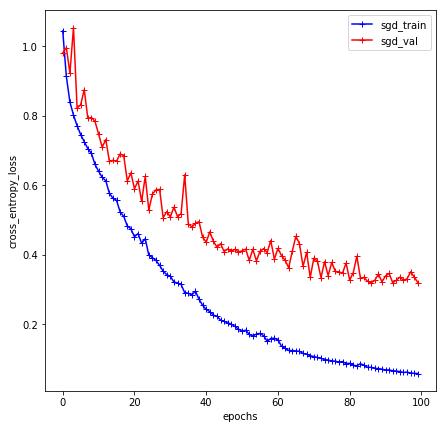

In [83]:
epochs = np.arange(len(history.history['loss']))
plt.plot(epochs,history.history['loss'],marker="+",color="b",label="sgd_train")
plt.plot(epochs,history.history['val_loss'],marker="+",color="r",label="sgd_val")
plt.xlabel("epochs") ; plt.ylabel("cross_entropy_loss") ; plt.legend()
plt.show()

In [84]:
categorical_Y_test = to_categorical(Y_test)
res = model.evaluate(X_test, categorical_Y_test)
print("SGD optimizer.\ncross-entropy loss, accurracy score : \n",res,"\n")

200/200 [==============================] - 0s 723us/step
SGD optimizer.
cross-entropy loss, accurracy score :  [0.19357110142707826, 0.935] 



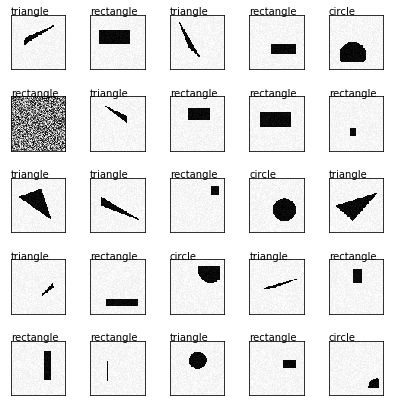

In [85]:
#plotting some data and their predictions

name_labels = ["rectangle","circle", "triangle"]

fig, ax = plt.subplots(5, 5, figsize=(7, 7))
fig.subplots_adjust(hspace=0.5, wspace=0.1)

for (idx,k) in enumerate(np.random.choice(X_test.shape[0],25)):
    i = idx%5; j = idx//5
    ax[i, j].xaxis.set_major_locator(plt.NullLocator())
    ax[i, j].yaxis.set_major_locator(plt.NullLocator())
    ax[i, j].imshow(X_test[k].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
    predicted_Y = model.predict(X_test[k][None,:])
    label = name_labels[np.argmax(predicted_Y)]
    ax[i,j].text(-0.5,-0.5,label,fontsize=10)

plt.show()

# Part 4 - A Regression Problem

In [122]:
N_train = 2000 ; N_val = 100 ; N_test = 300
N_total = N_train + N_val + N_test

[X, Y] = generate_dataset_regression(N_total, noise=20)

[X_train, Y_train] = [X[:N_train],Y[:N_train]]
[X_val, Y_val] = [X[N_train:N_train+N_val],Y[N_train:N_train+N_val]]
[X_test, Y_test] = [X[N_train+N_val:],Y[N_train+N_val:]]

Creating data:
Done


In [123]:
X_train = reshape_as_images(X_train)
X_val = reshape_as_images(X_val)
X_test = reshape_as_images(X_test)

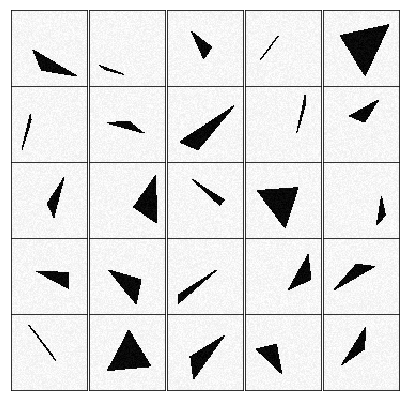

In [124]:
#visualizing some images of the train dataset

fig, ax = plt.subplots(5, 5, figsize=(7, 7))
fig.subplots_adjust(hspace=0., wspace=0.)

for (idx,k) in enumerate(np.random.choice(X_test.shape[0],25)):
    i = idx%5; j = idx//5
    ax[i, j].xaxis.set_major_locator(plt.NullLocator())
    ax[i, j].yaxis.set_major_locator(plt.NullLocator())
    ax[i, j].imshow(X_train[k].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

plt.show()

In [125]:
def normalize(Y):
    
    Z = np.zeros((Y.shape[0],6))
    
    r0A = Y[:,0]*Y[:,0] + Y[:,1]*Y[:,1]
    r0B = Y[:,2]*Y[:,2] + Y[:,3]*Y[:,3]
    r0C = Y[:,4]*Y[:,4] + Y[:,5]*Y[:,5]
    
    M = np.argsort(np.array([r0A,r0B,r0C]).T,axis=1)
            
    for k in range(M.shape[0]):
        Z[k,0] = Y[k,2*M[k,0]] #abciss vertex with lowest distance to G
        Z[k,1] = Y[k,2*M[k,0]+1]  
        Z[k,2] = Y[k,2*M[k,1]]
        Z[k,3] = Y[k,2*M[k,1]+1]
        Z[k,4] = Y[k,2*M[k,2]]
        Z[k,5] = Y[k,2*M[k,2]+1]
    
    return Z

In [126]:
Z_train = normalize(Y_train)
Z_val = normalize(Y_val)
Z_test = normalize(Y_test)

In [131]:
def build_regressor():
    
    model = Sequential()
    
    model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())    
    
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(6))
    
    return model

In [132]:
model = build_regressor()
model.summary()

model.compile(loss='mean_squared_error',optimizer='adam', metrics = ["accuracy"])
history = model.fit(X_train, Z_train, validation_data=(X_val,Z_val), epochs=100, callbacks=[early_stopping_monitor], batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 68, 68, 32)        832       
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 30, 30, 32)        25632     
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 11, 11, 32)        25632     
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 800)               0         
__________

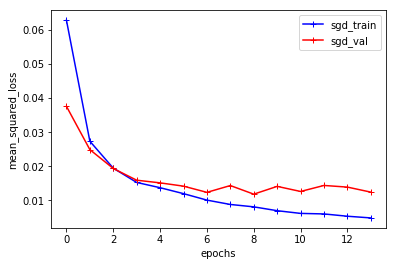

300/300 [==============================] - 1s 2ms/step
SGD optimizer.
mean-squared loss : [0.010067858242740233, 0.8200000007947286] 



In [133]:
epochs = np.arange(len(history.history['loss']))
plt.plot(epochs,history.history['loss'],marker="+",color="b",label="sgd_train")
plt.plot(epochs,history.history['val_loss'],marker="+",color="r",label="sgd_val")
plt.xlabel("epochs") ; plt.ylabel("mean_squared_loss") ; plt.legend()
plt.show()

res = model.evaluate(X_test, Z_test)
print("SGD optimizer.\nmean-squared loss :",res,"\n")

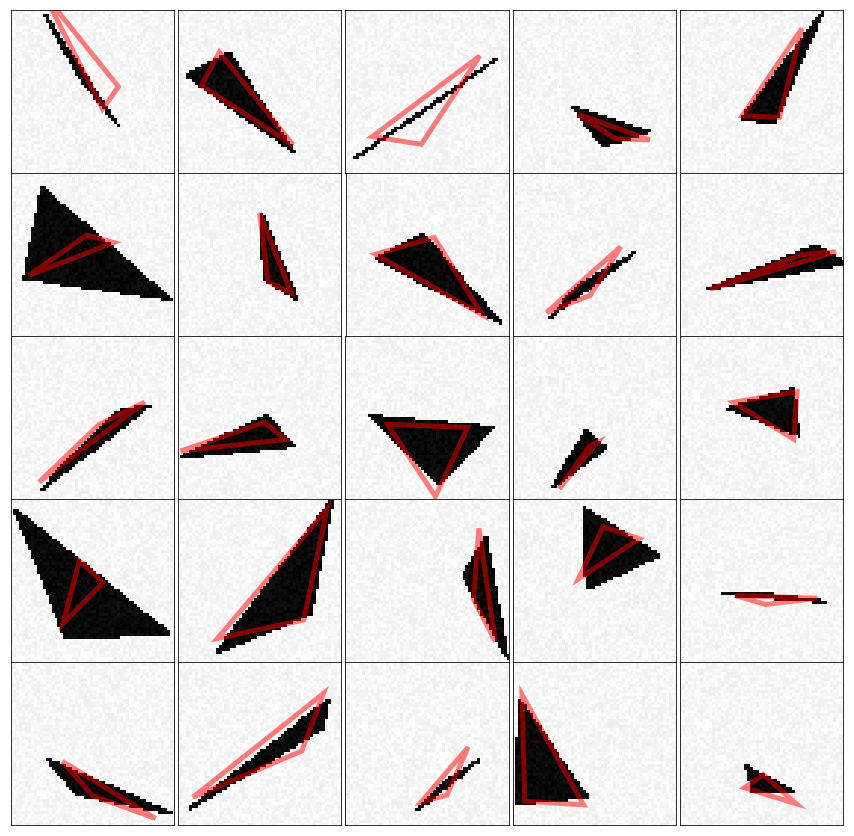

In [134]:
def visualize_prediction(x, y, IMAGE_SIZE, ax):
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

fig, ax = plt.subplots(5, 5, figsize=(15, 15))
fig.subplots_adjust(hspace=0., wspace=0.)

for (idx,k) in enumerate(np.random.choice(X_test.shape[0],25)):
    i = idx%5; j = idx//5
    ax[i, j].xaxis.set_major_locator(plt.NullLocator())
    ax[i, j].yaxis.set_major_locator(plt.NullLocator())
    x = X_test[k,:]
    y = model.predict(x[None,:,:,:])
    visualize_prediction(x, y, IMAGE_SIZE, ax[i, j])
    
plt.show()    

## another normalization

In [ ]:
def normalize_2(Y):
    
    Z = np.zeros((Y.shape[0],6))
    Z[:,0] = (Y[:,0] + Y[:,2] + Y[:,4])/3.  #barycenter
    Z[:,1] = (Y[:,1] + Y[:,3] + Y[:,5])/3.
    
    xGA = Y[:,0] - Z[:,0] 
    yGA = Y[:,1] - Z[:,1]
    xGB = Y[:,2] - Z[:,0] 
    yGB = Y[:,3] - Z[:,1]
    xGC = Y[:,4] - Z[:,0] 
    yGC = Y[:,5] - Z[:,1]
    
    r0 = yGA/xGA
    r1 = yGB/xGB
    r2 = yGC/xGC
    
    alpha = np.arctan(r0) + pi*(xGA<0) + 2*pi*((xGA>0)*(yGA<0))  #angle between xA-xG and x-axis        
    beta = np.arctan(r1) + pi*(xGB<0) + 2*pi*((xGB>0)*(yGB<0)) #angle between xB-xG and x-axis
    gamma = np.arctan(r2) + pi*(xGC<0)+ 2*pi*((xGC>0)*(yGC<0)) #angle between xC-xG and x-axis 
    M = np.argsort(np.array([alpha,beta,gamma]).T,axis=1)
    
    for k in range(M.shape[0]):
        Z[k,0] = Y[k,2*M[k,0]] #abciss vertex with lowest angle
        Z[k,1] = Y[k,2*M[k,0]+1]  
        Z[k,2] = Y[k,2*M[k,1]]
        Z[k,3] = Y[k,2*M[k,1]+1]
        Z[k,4] = Y[k,2*M[k,2]]
        Z[k,5] = Y[k,2*M[k,2]+1]
    
    return Z

In [115]:
Z_train = normalize_2(Y_train)
Z_val = normalize_2(Y_val)
Z_test = normalize_2(Y_test)

model = build_regressor()
model.summary()

from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience = 5)

model.compile(loss='mean_squared_error',optimizer='adam', metrics = ["accuracy"])
history = model.fit(X_train, Z_train, validation_data=(X_val,Z_val), epochs=10, callbacks=[early_stopping_monitor], batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 68, 68, 32)        832       
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 30, 30, 32)        25632     
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 11, 11, 32)        25632     
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 800)               0         
__________

KeyboardInterrupt: 

In [ ]:
def visualize_prediction(x, y, IMAGE_SIZE, ax):
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

fig, ax = plt.subplots(5, 5, figsize=(15, 15))
fig.subplots_adjust(hspace=0., wspace=0.)

for (idx,k) in enumerate(np.random.choice(X_test.shape[0],25)):
    i = idx%5; j = idx//5
    ax[i, j].xaxis.set_major_locator(plt.NullLocator())
    ax[i, j].yaxis.set_major_locator(plt.NullLocator())
    x = X_test[k,:]
    y = model.predict(x[None,:,:,:])
    visualize_prediction(x, y, IMAGE_SIZE, ax[i, j])
    
plt.show()    

# Part 5 -  Image Denoising

In [135]:
N_train = 1000 ; N_val = 100 ; N_test = 300
N_total = N_train + N_val + N_test

[X, Y] = generate_dataset_denoising(N_total, noise=100., free_location=False)

[X_train, Y_train] = [X[:N_train],Y[:N_train]]
[X_val, Y_val] = [X[N_train:N_train+N_val],Y[N_train:N_train+N_val]]
[X_test, Y_test] = [X[N_train+N_val:],Y[N_train+N_val:]]

Creating data:
Done


Noised image (left) and without noise (right)


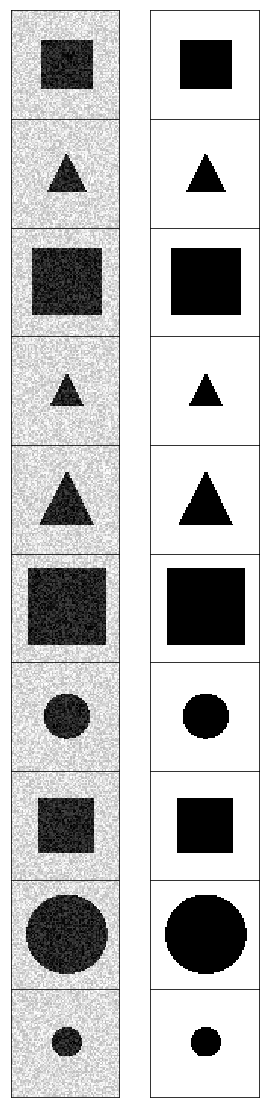

In [136]:
#visualizing some images of the train dataset

print("Noised image (left) and without noise (right)")

fig, ax = plt.subplots(10, 2, figsize=(5, 20))
fig.subplots_adjust(hspace=0., wspace=0.)

for (i,k) in enumerate(np.random.choice(X_test.shape[0],10)):
    
    ax[i, 0].xaxis.set_major_locator(plt.NullLocator())
    ax[i, 0].yaxis.set_major_locator(plt.NullLocator())
    ax[i, 0].imshow(X_train[k].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
            
    ax[i, 1].xaxis.set_major_locator(plt.NullLocator())
    ax[i, 1].yaxis.set_major_locator(plt.NullLocator())
    ax[i, 1].imshow(Y_train[k].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

plt.show()

In [137]:
X_train = reshape_as_images(X_train)
Y_train = reshape_as_images(Y_train)

X_val = reshape_as_images(X_val)
Y_val = reshape_as_images(Y_val)

X_test = reshape_as_images(X_test)
Y_test = reshape_as_images(X_test)

In [144]:
#We can assume that a latent space of dimension 6 is sufficient
#(triangle : 6, rectangle : 6, circle : 3)

def build_hourglass_network_0():
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', padding='same',input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    #model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    #model.add(UpSampling2D((2,2)))
    model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
    model.add(UpSampling2D((4,4)))
    model.add(Conv2D(1, (5, 5), activation='sigmoid', padding='same'))
    return model


def build_hourglass_network():
    N_maps = 8
    model = Sequential()
    model.add(Conv2D(N_maps, (5, 5), activation='relu', padding='same',input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(N_maps, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(N_maps, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(N_maps, (5, 5), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(N_maps, (5, 5), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(N_maps, (5, 5), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(1, (5, 5), activation='sigmoid', padding='same'))
    return model

#72/4 = 18

In [145]:
model = build_hourglass_network()
model.summary()
model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(X_train, Y_train, validation_data=(X_val,Y_val), epochs=100, callbacks=[early_stopping_monitor], batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 72, 72, 8)         208       
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 36, 36, 8)         0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 36, 36, 8)         1608      
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 18, 18, 8)         0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 18, 18, 8)         1608      
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 9, 9, 8)           0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 9, 9, 8)           1608      
__________

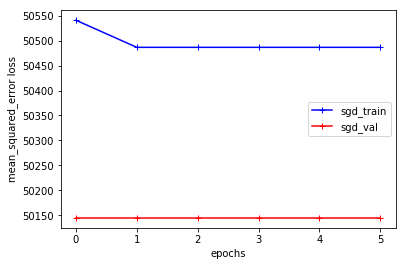

300/300 [==============================] - 1s 3ms/step
SGD optimizer.
mean_squared_error loss :  0.10888714939355851 



In [146]:
epochs = np.arange(len(history.history['loss']))
plt.plot(epochs,history.history['loss'],marker="+",color="b",label="sgd_train")
plt.plot(epochs,history.history['val_loss'],marker="+",color="r",label="sgd_val")
plt.xlabel("epochs") ; plt.ylabel("mean_squared_error loss") ; plt.legend()
plt.show()

res = model.evaluate(X_test, Y_test)
print("SGD optimizer.\nmean_squared_error loss : ",res,"\n")

Noised image (left) and denoised image (right)


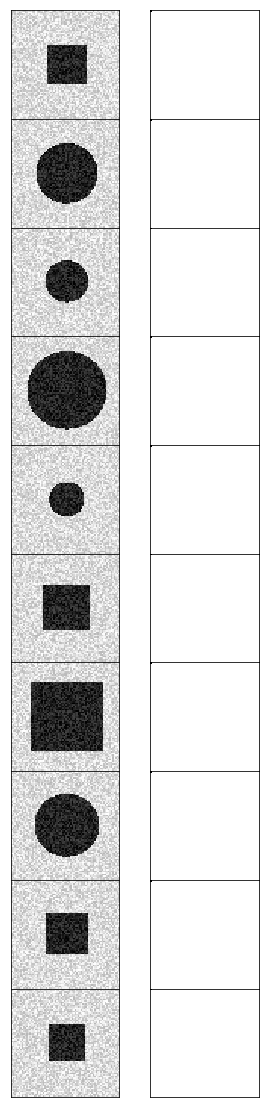

In [147]:
#Visualizing some denoised images

input_images = X_test[np.random.choice(X_test.shape[0],10)] 
denoised_images =  model.predict(input_images)

print("Noised image (left) and denoised image (right)")

fig, ax = plt.subplots(10, 2, figsize=(5, 20))
fig.subplots_adjust(hspace=0., wspace=0.)

for i in range(len(input_images)):
    
    ax[i, 0].xaxis.set_major_locator(plt.NullLocator())
    ax[i, 0].yaxis.set_major_locator(plt.NullLocator())
    ax[i, 0].imshow(input_images[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
        
    ax[i, 1].xaxis.set_major_locator(plt.NullLocator())
    ax[i, 1].yaxis.set_major_locator(plt.NullLocator())
    ax[i, 1].imshow(denoised_images[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

plt.show()


#to "normalize vertices"
#we caracterize a triangle :
# - i) by the position of its mass center
# - ii) by the distance from the mass center to any vertex (center of circumscribed circle) 
# - iii) by the orientation of the vectors from the mass center to each vertex

# with i) and ii) we in fact caracterize the circumscribed circle of the triangle
# and with iii) the orientation of the triangle in this circle
# we still have 6 parameters per triangle !

def normalize_0(Y):
    
    Z = np.zeros((Y.shape[0],6))
    Z[:,0] = (Y[:,0] + Y[:,2] + Y[:,4])/3.  #barycenter
    Z[:,1] = (Y[:,1] + Y[:,3] + Y[:,5])/3.
    
    xGA = Y[:,0] - Z[:,0] 
    yGA = Y[:,1] - Z[:,1]
    Z[:,2] = xGA*xGA + yGA*yGA #distance barycenter to center (radius circumscribed circle)
    
    xGB = Y[:,2] - Z[:,0] 
    yGB = Y[:,3] - Z[:,1]
    xGC = Y[:,4] - Z[:,0] 
    yGC = Y[:,5] - Z[:,1]
    
    r0 = yGA/xGA
    r1 = yGB/xGB
    r2 = yGC/xGC
    
    alpha = np.arctan(r0) + pi*(xGA<0) + 2*pi*((xGA>0)*(yGA<0))  #angle between xA-xG and x-axis        
    beta = np.arctan(r1) + pi*(xGB<0) + 2*pi*((xGB>0)*(yGB<0)) #angle between xB-xG and x-axis
    gamma = np.arctan(r2) + pi*(xGC<0)+ 2*pi*((xGC>0)*(yGC<0)) #angle between xC-xG and x-axis
    
    M = np.sort(np.array([alpha,beta,gamma]).T,axis=1)
    
    Z[:,3] = M[:,0] #min of these three angles
    Z[:,4] = M[:,1] #angle in between
    Z[:,5] = M[:,2] #max of these three angles
    
    return Z

def denormalize_0(Z):
    
    Y = np.zeros((Z.shape[0],6))
    
    radius = np.sqrt(Z[:,2])
    
    Y[:,0] = Z[:,0] + radius*np.cos(Z[:,3]) #xG + R*cos(Ox,xGA)
    Y[:,1] = Z[:,1] + radius*np.sin(Z[:,3])
    
    Y[:,2] = Z[:,0] + radius*np.cos(Z[:,4])
    Y[:,3] = Z[:,1] + radius*np.sin(Z[:,4])
    
    Y[:,4] = Z[:,0] + radius*np.cos(Z[:,5])
    Y[:,5] = Z[:,1] + radius*np.sin(Z[:,5])
    
    return Y
    
   def normalize(Y):
    #sorting vertices by angle with respect to x_axis
    Z = np.zeros((Y.shape[0],6))
    alpha = np.arctan(Y[:,1]/(Y[:,0])) #angle between xA and x-axis
    beta = np.arctan(Y[:,3]/(Y[:,2])) #angle between xB and x-axis
    gamma = np.arctan(Y[:,5]/(Y[:,4])) #angle between xC and x-axis
    M = np.argsort(np.array([alpha,beta,gamma]).T,axis=1)
    for k in range(M.shape[0]):
        Z[k,0] = Y[k,2*M[k,0]] #abciss vertex with lowest angle
        Z[k,1] = Y[k,2*M[k,0]+1]  
        Z[k,2] = Y[k,2*M[k,1]]
        Z[k,3] = Y[k,2*M[k,1]+1]
        Z[k,4] = Y[k,2*M[k,2]]
        Z[k,5] = Y[k,2*M[k,2]+1]
    return Z